In [1]:
import pandas as pd
import os
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from lib.cux002 import *

In [3]:
method= 'bicso0'

In [4]:
left_symbol = 'ims'
right_symbol = 'ics'

In [ ]:
left_data = fetch_data(method=method, instruments=left_symbol).set_index('trade_time')
right_data = fetch_data(method=method, instruments=right_symbol).set_index('trade_time')

In [9]:
expressions = ["EMA(2,MCPS(2,'oi034_1_2_1'))","EMA(2,MCPS(2,EMA(2,'oi034_1_2_1')))",
               "MCPS(2,'oi034_1_2_1')",
               "MRes(3,MMinDiff(2,'oi022_1_2_1'),MPWMA(4,'tv004_1_2_1','rv001_2_3_0_2'))",
               "MRes(3,'tc015_1_2_1','tc003_1_1_2_3_1')",
               "MRes(3,'tc015_1_2_1',EMA(3,'tn003_1_1_2_3_1'))",
               "MDPO(3,'tv017_1_2_1')","MCPS(2,'oi034_1_2_1')",
               "EMA(2,MCPS(2,EMA(2,'oi034_1_2_1')))"]
expression = expressions[2]
expression = "DELTA(2,'tc004_1_1_2_0')"

In [11]:
left_evaluate = calc_all(expression=expression, total_data1=left_data, period=15)
right_evaluate = calc_all(expression=expression, total_data1=right_data, period=15)

                     transformed code
trade_time                           
2022-07-25 09:31:00          NaN   IM
2022-07-25 09:32:00    -8.000000   IM
2022-07-25 09:33:00    -1.050000   IM
2022-07-25 09:34:00    -0.350000   IM
2022-07-25 09:35:00     4.650000   IM
...                          ...  ...
2025-03-14 14:56:00    -3.554066   IM
2025-03-14 14:57:00    -3.132397   IM
2025-03-14 14:58:00     0.481907   IM
2025-03-14 14:59:00     0.180715   IM
2025-03-14 15:00:00     1.686675   IM

[153996 rows x 2 columns]
                    code  fz002_1_2_1  fz002_10_15_1  fz002_1_2_0  \
trade_time                                                          
2022-07-25 09:30:00   IM     0.000896       0.000012     0.000407   
2022-07-25 09:31:00   IM     0.000299       0.000014     0.000407   
2022-07-25 09:32:00   IM     0.000672       0.000023     0.000266   
2022-07-25 09:33:00   IM     0.000224       0.000033     0.000266   
2022-07-25 09:34:00   IM     0.000075       0.000042     0.000000

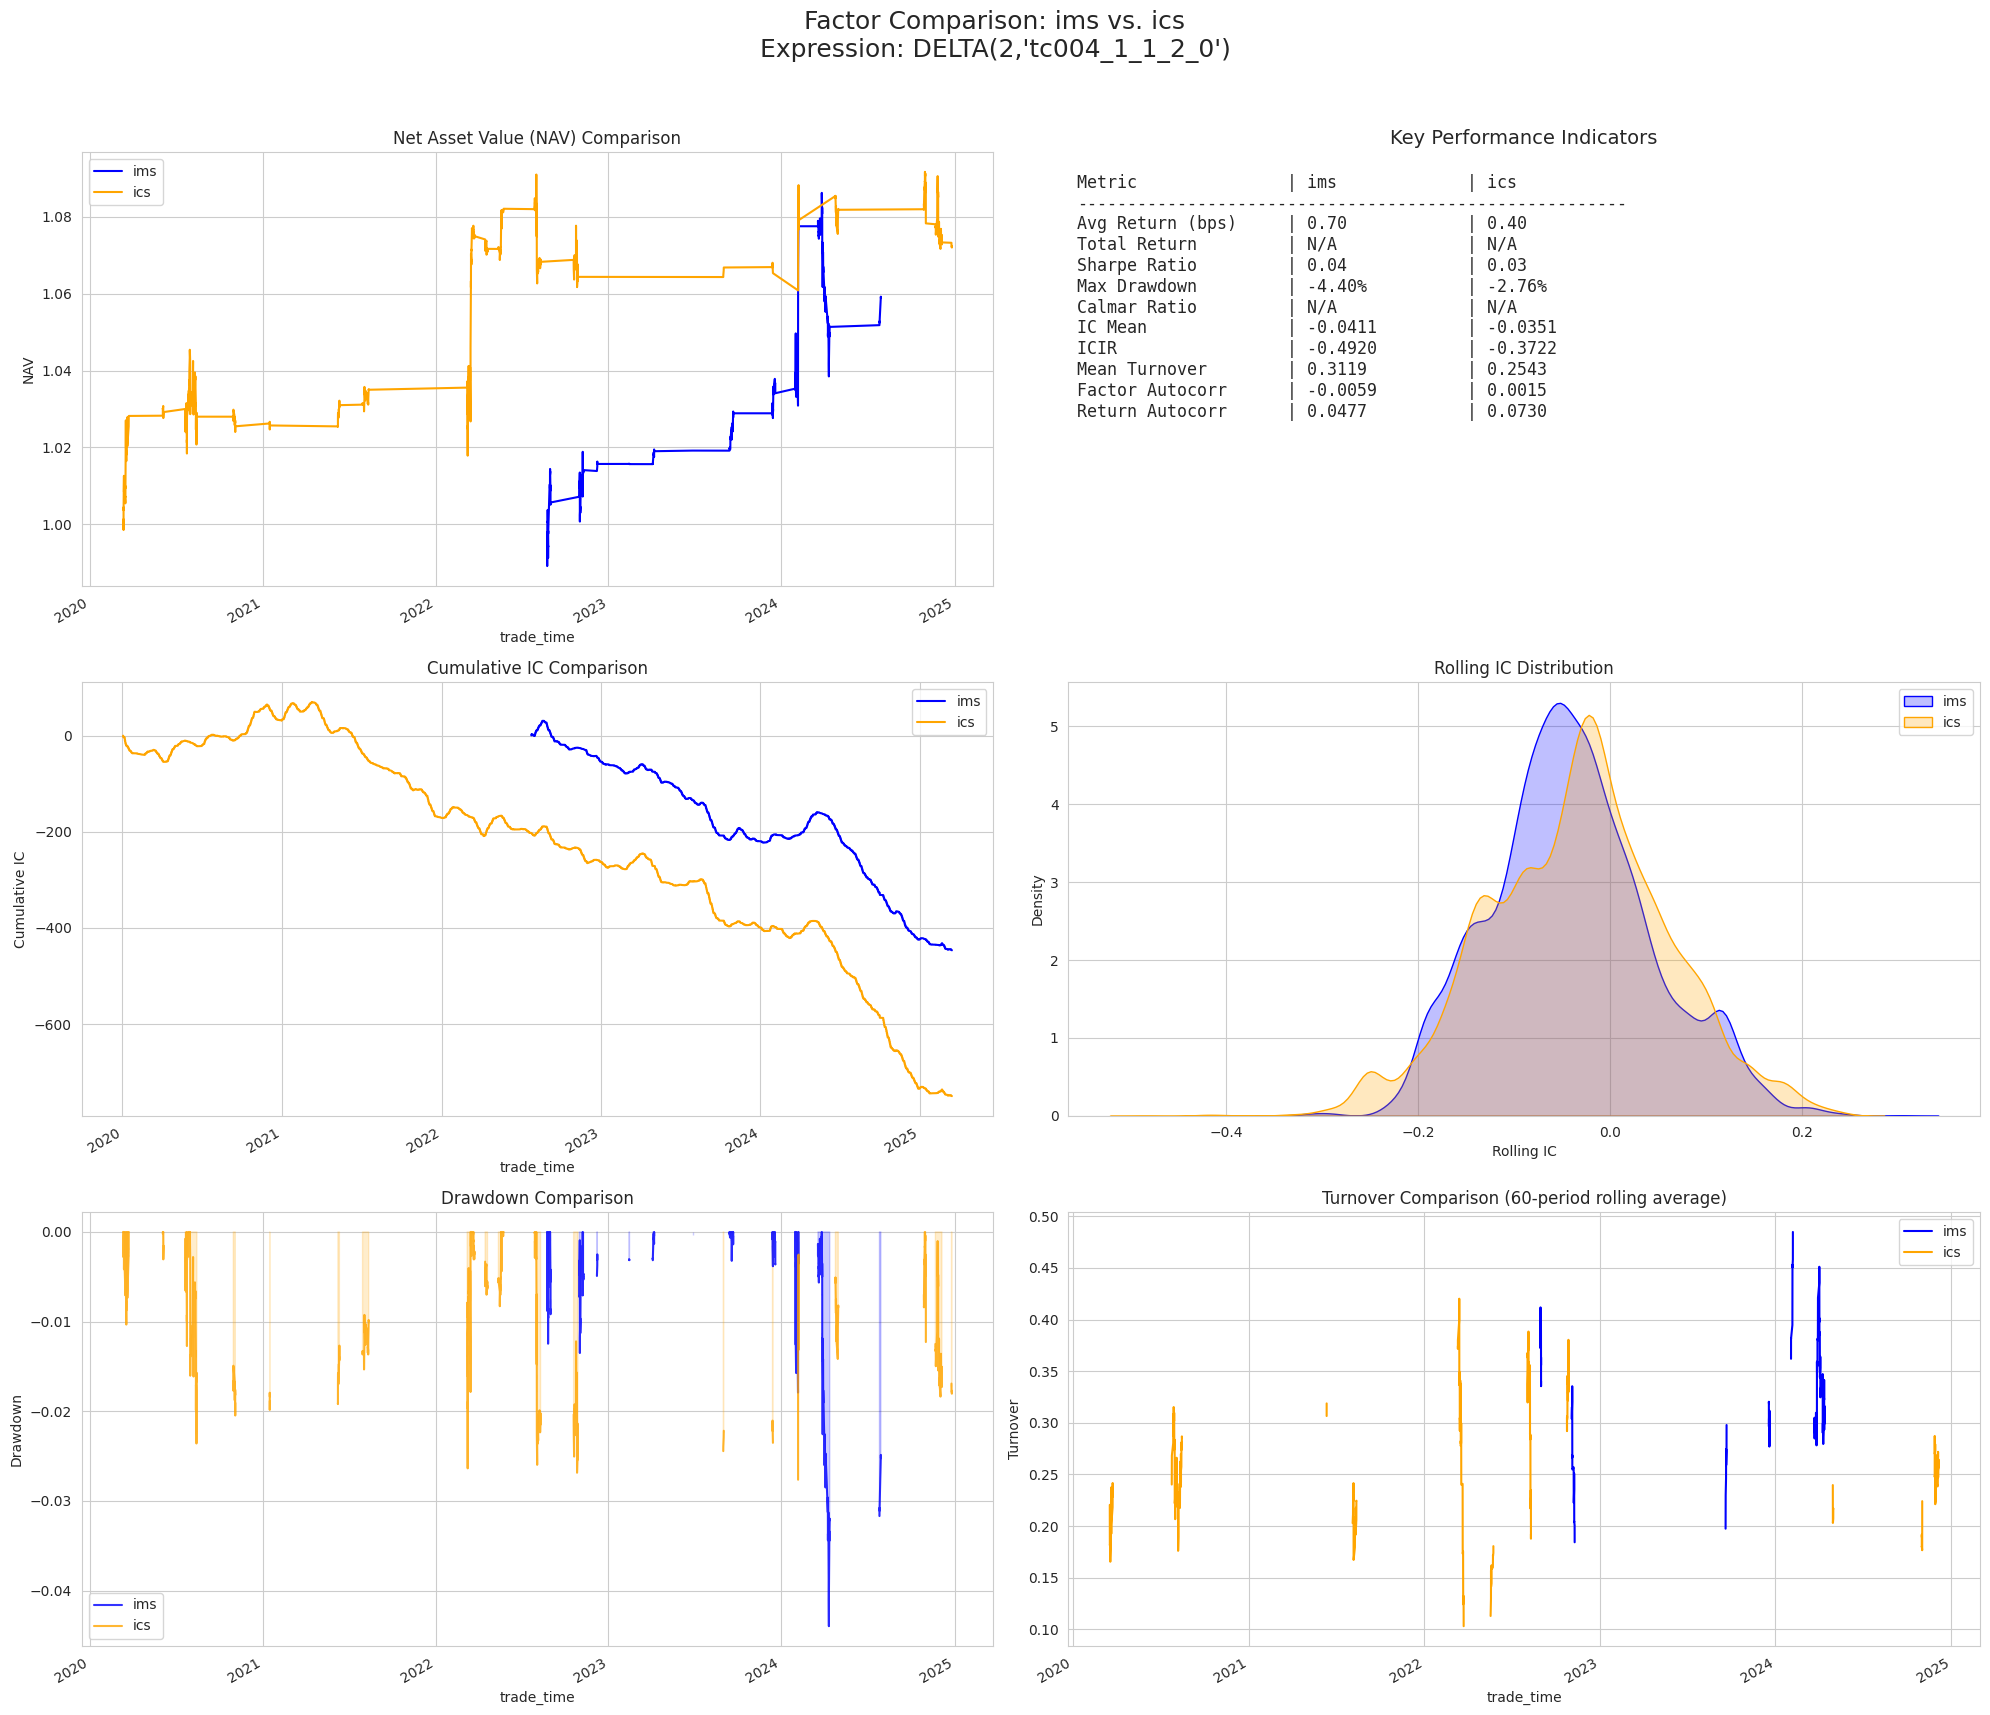

In [12]:
plot_comparison(eval_left=left_evaluate, eval_right=right_evaluate,
                    left_name=left_symbol, right_name=right_symbol)